In [10]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

Place name which is used to retrieve the data from OSM

In [11]:
place_name = 'Durango, Durango, Mexico'

Retrieve the street network

In [12]:
G = ox.graph_from_place(place_name, network_type='drive')

nodes, edges = ox.graph_to_gdfs(G)

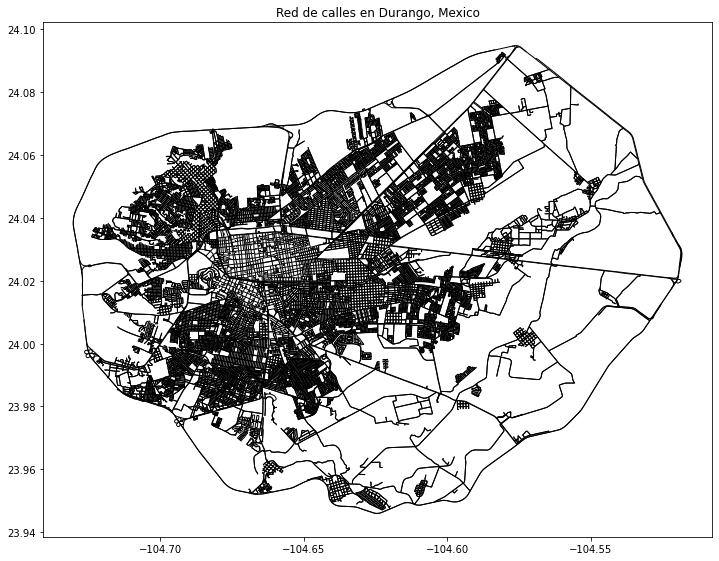

In [13]:
# Plotear el mapa con las calles de Durango

fig, ax = plt.subplots(figsize=(12, 12))
edges.plot(ax=ax, linewidth=1, edgecolor="black")
ax.set_title("Red de calles en Durango, Mexico")

plt.show()

In [14]:
from sklearn.neighbors import NearestNeighbors

# Extraer las coordenadas de los nodos 
X = nodes[['y', 'x']].values # y es la latitud y x es longitud

# Crear el modelo KNN
knn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
knn.fit(X)

NearestNeighbors(algorithm='ball_tree')

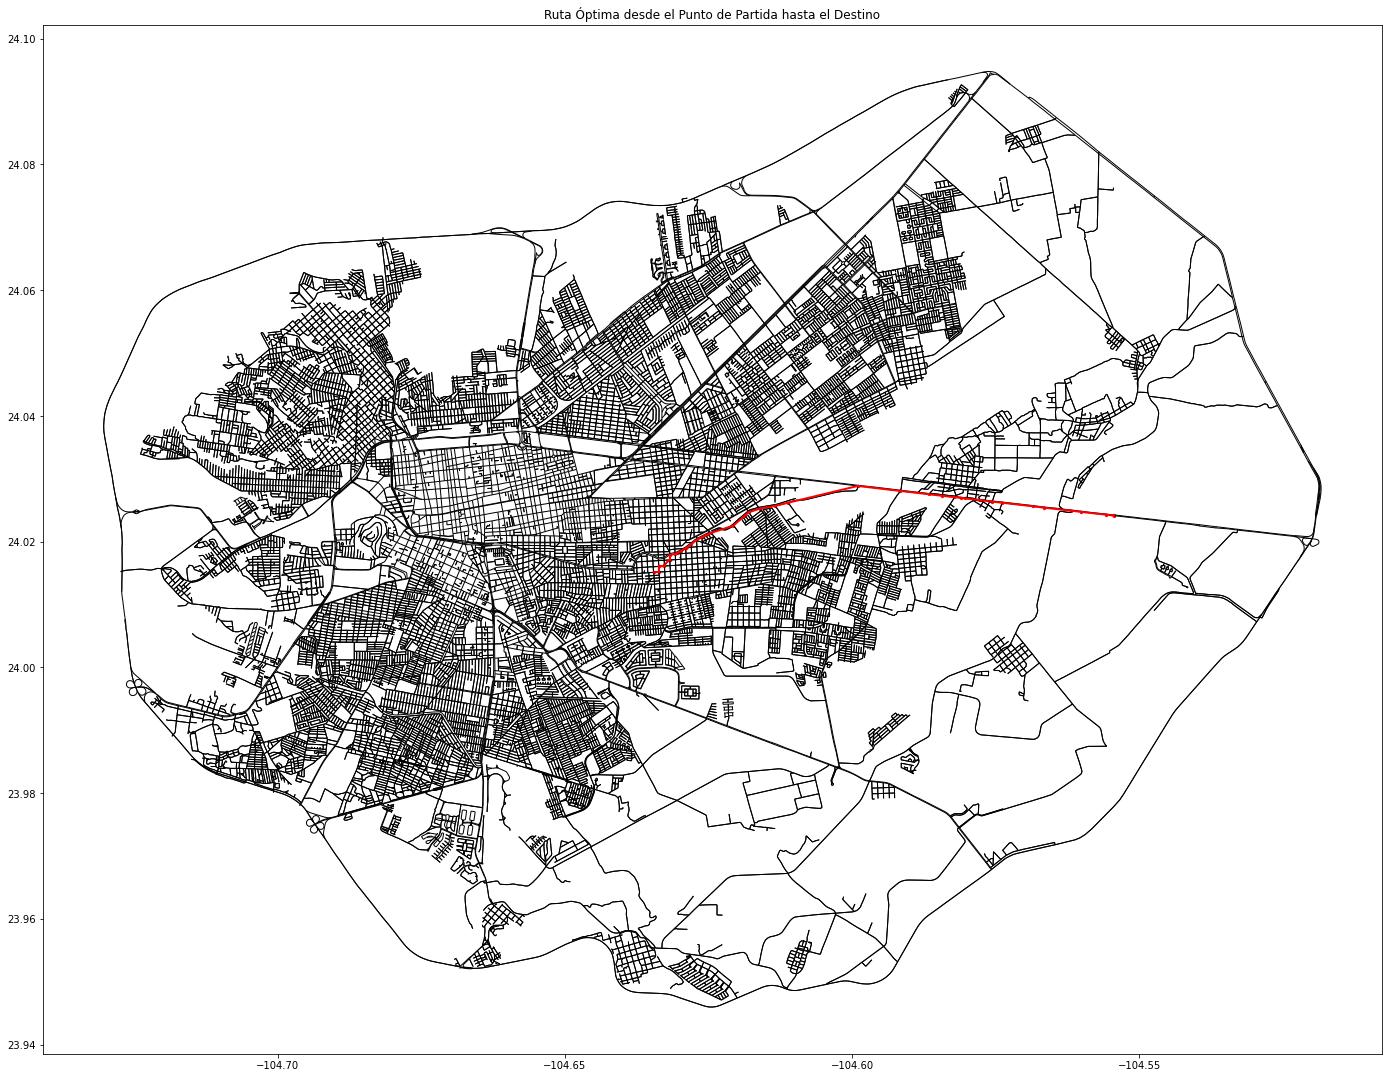

In [22]:
def define_route(start_point, end_point, G):
    # Encontrar los nodos más cercanos a los puntos de partida y destino
    start_node_idx = knn.kneighbors([start_point], return_distance=False)[0][0]
    end_node_idx = knn.kneighbors([end_point], return_distance=False)[0][0]

    # Obtener los IDs de los nodos en el grafo
    start_node = nodes.iloc[start_node_idx].name
    end_node = nodes.iloc[end_node_idx].name

    # Calcular la ruta más corta entre los nodos
    route = ox.shortest_path(G, start_node, end_node, weight='length')

    # Obtener las coordenadas de los nodos de la ruta
    route_nodes = nodes.loc[route]

    # Visualizar la ruta en el mapa
    fig, ax = plt.subplots(figsize=(24, 24))
    
    # Plotear las calles (edges)
    edges.plot(ax=ax, linewidth=1, edgecolor="black")
    
    # Plotear la ruta más corta sobre el mapa
    route_nodes.plot(ax=ax, color="red", marker="o", markersize=5, label="Ruta Óptima")
    
    # Dibujar las líneas que conectan los nodos en la ruta
    for i in range(len(route) - 1):
        n1 = nodes.loc[route[i]]
        n2 = nodes.loc[route[i+1]]
        ax.plot([n1['x'], n2['x']], [n1['y'], n2['y']], color="red", linewidth=2)

    ax.set_title("Ruta Óptima desde el Punto de Partida hasta el Destino")
    plt.show()  # Mostrar el mapa con la ruta

# Coordenadas del punto de partida y destino
start_point = [24.01556706192251, -104.63455235063951]
end_point = [24.023969810641127, -104.55349166104186]

# Llamar a la función para definir y mostrar la ruta
define_route(start_point, end_point, G)
